In [1]:
# Fill in your name using the format below and student ID number
your_name = "van Dooren, Bart"
student_id = "1006262"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Bart, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [5]:
#base_dir = '/content/drive/My Drive/assignment-3-bartvdooren' # For Google Colab
base_dir = 'C:/Users/balo/Documents/uni/assignment-3-bartvdooren'

In [32]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [6]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [7]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [8]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [9]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

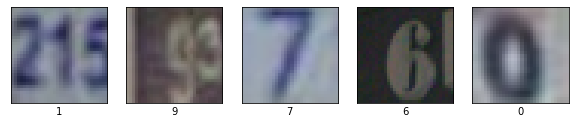

In [10]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [11]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_7 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dense_8 (Dense)              (None, 200)               153800    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2010      
Total params: 6,056,354
Trainable params: 6,056,354
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.168704  0.373757 

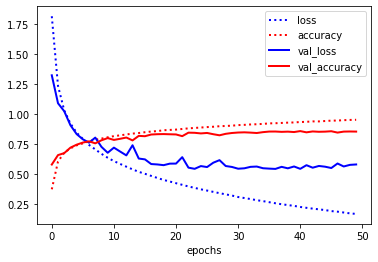

In [12]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
    # Create Sequential model
    model = models.Sequential()

    # Reshape the input
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))

    # Add dense layers to model
    model.add(layers.Dense(1536, activation='relu'))
    model.add(layers.Dense(768, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    # Add softmax output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # Return the model
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_1 = """These layers give the best val_accuracy,adding a layer or higher/lower number of nodes gave worse results.
Batch size=32 gives the best result,a higher size gives more overfitting and a lower size results in a stuck accuracy.
Testing all the Keras optimizers, adagrad with a 0.01 learning rate results in the best val_accuracy with little val_loss spikes.
With an accuracy of 85.8% and little spikes, the model performs well.There is some overfitting as the acuraccy is higher than the val_accuracy."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [13]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1536)              1574400   
_________________________________________________________________
dense_11 (Dense)             (None, 768)               1180416   
_________________________________________________________________
dense_12 (Dense)             (None, 200)               153800    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2010      
Total params: 2,910,626
Trainable params: 2,910,626
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.195216  0.387889 

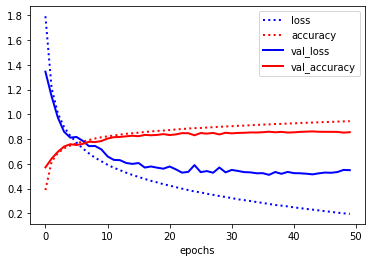

In [14]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    # Create Sequential model
    model = models.Sequential()

    # Reshape the input based on gray-scaled images
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

    # Add dense layers to model
    model.add(layers.Dense(1536, activation='relu'))
    model.add(layers.Dense(768, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    # Add softmax output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Return the model
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_2 = """We gray-scale the train and val data and adapt the input shape.
Compared to model_1_1,time per epoch is less due to less parameters.
There is an increase in val_accurracy of 0.4%,but a decrease in accuracy of 0.8%,also smaller val_loss spikes.
Thus less overfitting,as the val_accuracy is closer to the accuracy.
Thus the model is performing better,as the val_accuracy is higher but also less costly to compute.
Thus color introduces noice and the model is memorizing the noice less by gray-scaling."""

print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1536)              1574400   
_________________________________________________________________
dense_9 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               153800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)     

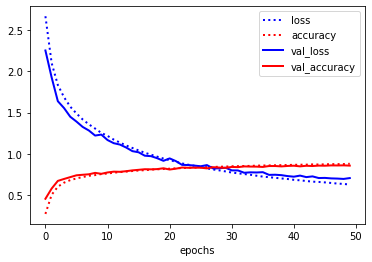

In [15]:
from tensorflow.keras import regularizers

def build_model_1_3():
    # Create Sequential model
    model = models.Sequential()

    # Reshape the input based on gray-scaled images
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

    # Add dense layers to model and dropout with BatchNormalization
    model.add(layers.Dense(1536, kernel_regularizer=regularizers.l2(0.00025), activation='relu'))
    model.add(layers.Dense(768, kernel_regularizer=regularizers.l2(0.00025), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(200, kernel_regularizer=regularizers.l2(0.00025), activation='relu'))
    model.add(layers.Dropout(0.5))
    # Add softmax output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # Return model
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_3 = """A l2 regularizer and gradually increasing dropout reduces the overfitting of model_1_2,but the val_accuracy decreases by 0.2%.
A ridge regularizer gets better results than lasso, less overfitting.Other optimers,batch size or learing rate results in worse val_accuracy or heavy val_loss spikes.
Batchnormalization has no effect and increasing dropout gives worse val_accuracy.
Regularization does remove overfitting,but doesn't improve the model.The loss of training an val now decreases gradually."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        544       
_________________________________________________________________
batch_normalization_67 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        16416     
_________________________________________________________________
batch_normalization_68 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_86 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)  

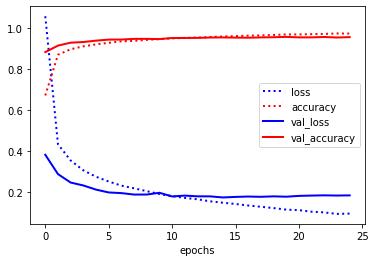

In [16]:
def build_model_2_1():
  # Create Sequential model
  model = models.Sequential()

  # Reshape the input based on gray-scaled images
  model.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(200, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(200, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  # Add softmax output layer
  model.add(layers.Dense(10, activation='softmax'))

  # Compile the model
  model.compile(optimizer=optimizers.Adagrad(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  # Return model
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=32)
answer_q_2_1 = """We start by mimicing a VGC16 like-model, as this works well as baseline model for images.
This model uses blocks of conv layers with maxpooling and dropout after.
The maxpooling after conv layers, helps to reduce the computations and extracting more dominant features, which helps with overfitting.
To tackle the remaining overfitting, a gradually increasing dropout helps to reduce overfitting.
This works as deep layers in the model reguralize more than layers close to input layer.
Doubling the filter size in the conv blocks works best with last conv block having size 200,which results in the best results.
Adding/removing conv layers results in worse results and kernal size 4x4 results in the best results.
The model works well,but could have been stopped at epoch 15,as it start overfitting."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        544       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)      

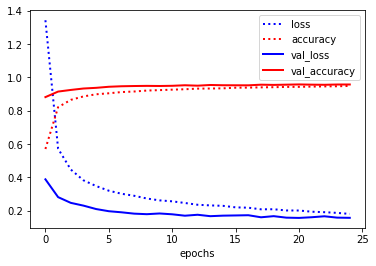

In [17]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmented imageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range= 10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[1,1.25])

# Augmented the training data
augmented_train = train_datagen.flow(rgb2gray(X_train), y_train)

# Combine generator with gray-scaled validation data and labels
augmented_split = augmented_train, rgb2gray(X_val), y_val, 

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator=True, steps_per_epoch=1968, epochs=25, batch_size=32)
answer_q_2_2 = """Using a small rotation, shift and zoom, we achieve a 0.2% increase in val_accuracy.
Bigger values for rotation,shift or zoom gives worse accuracy.
Rescaling, brightness, zca_whitening, shear or zca_epsilon results in worse accuracy.
A small augmentation improves the model slightly, it has more data to train on and a small augmentation could make a number more visible, while a larger change
makes the image harder to recognize or changes the orientation, such as with flipping(9 becomes 6)."""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

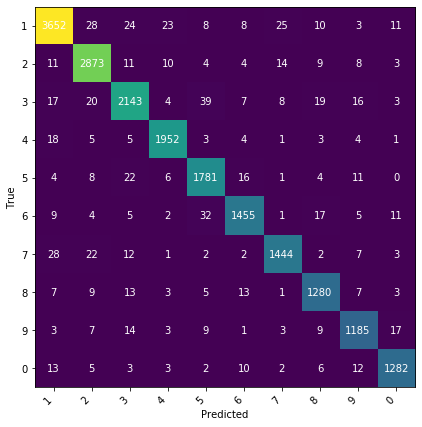

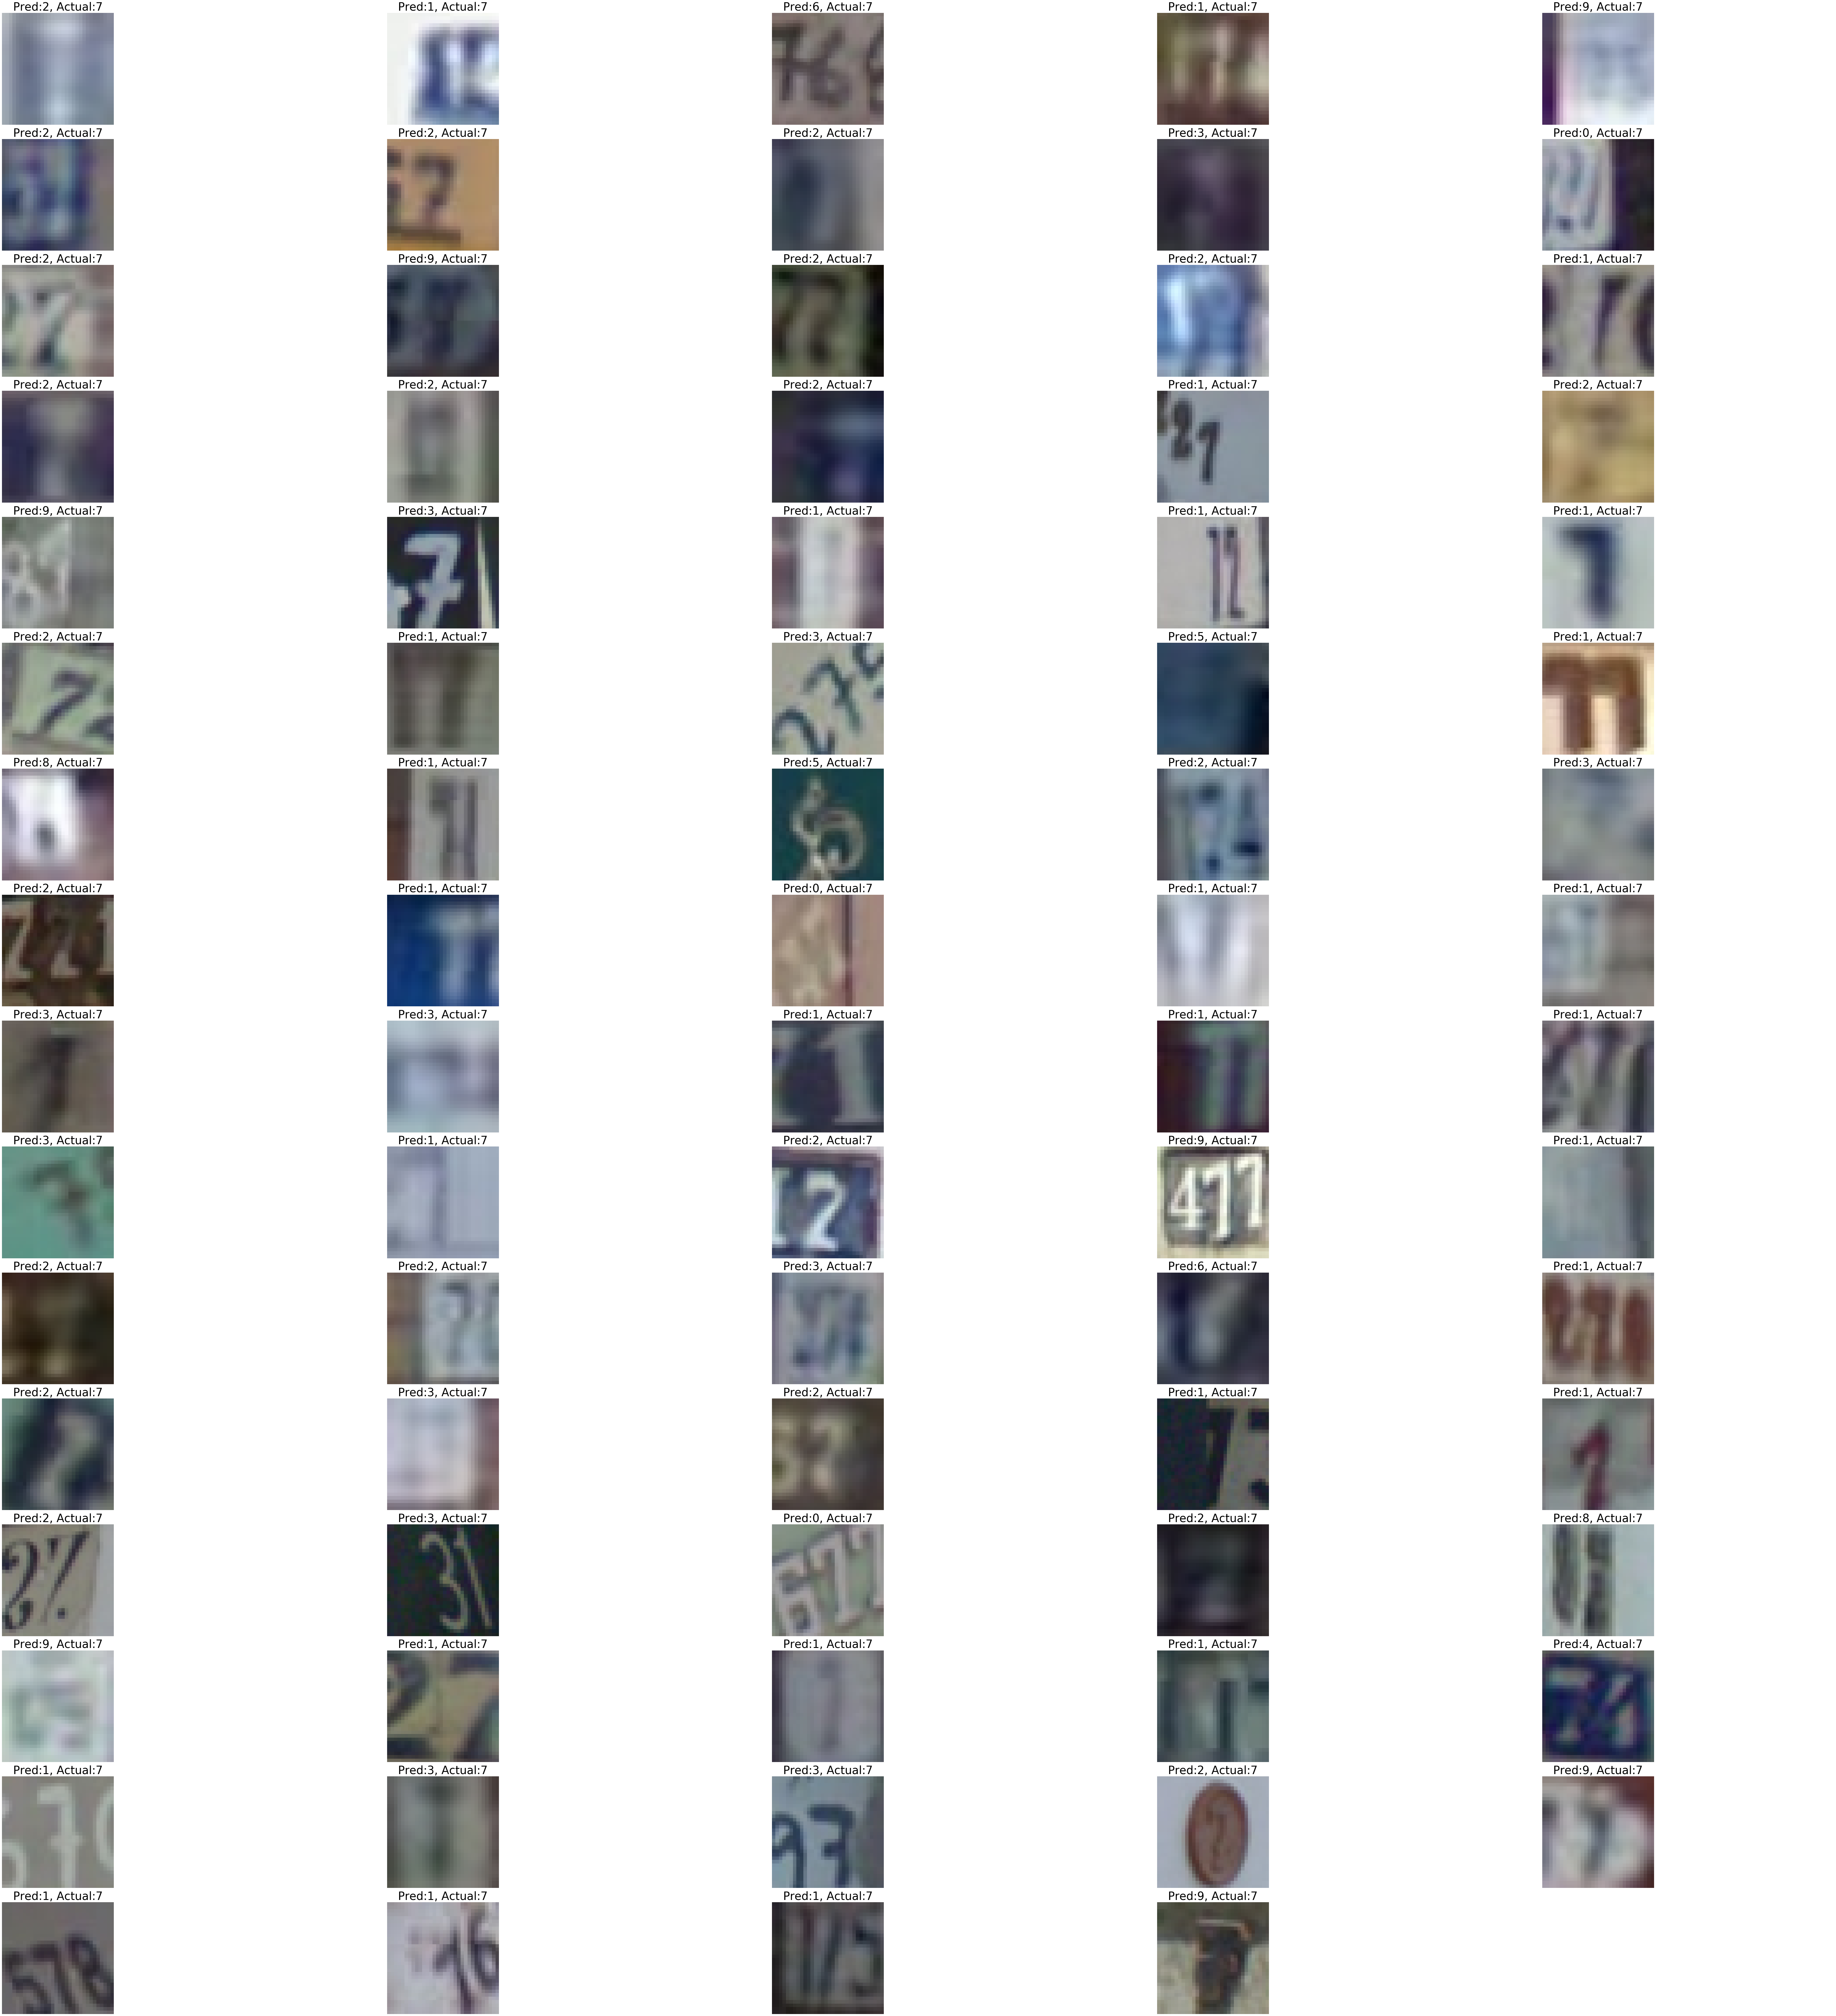

Answer is 799 characters long


In [18]:
from sklearn.metrics import confusion_matrix
import math

def plot_confusion_matrix():

  # Load model 2_2
  model = load_model_from_file(base_dir, "model_2_2", extension='.h5')

  # Predict labels for X_test training data
  y_pred = model.predict(rgb2gray(X_test))

  # All misclassified labels
  misclassified_labels = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

  # Plot graph
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots(figsize=(7,7))
  im = ax.imshow(cm)

  # Define all label classes, 0 is last
  label_classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(label_classes, rotation=45, ha="right")
  ax.set_yticklabels(label_classes)
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')

  for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
  return misclassified_labels, y_pred

def plot_misclassifications():
  # Define label to check
  label_to_check = 7

  wrong_images = list()
  y_predicted = list()

  # Loop over every missclassified sample
  for i in misclassified_labels:
    # Check if label i in y_test (which is misclassified), is indeed the label we want to check,
    # which would then result in 1, if result in 0, it would be another missclassified label
    if y_test[i][label_to_check-1] == 1:
        # Append the image and the predicted label to a list
        wrong_images.append(X_test[i])
        y_predicted.append(y_pred[i])

  nrows, ncols = math.ceil(len(wrong_images)/5), 5  

  # Figure size
  figsize = [100, 100]  

  # create figure and axis
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  

  # plot simple raster image on each sub-plot
  y_predicted2 = [(np.argmax(entry)+1)%10 for entry in y_predicted]
  for i, axi in enumerate(ax.flat):
      # Set image
      if (i < len(wrong_images)):
        img = wrong_images[i]
        axi.imshow(img)
        # Set title
        axi.set_title("Pred:"+str(y_predicted2[i])+", Actual:"+str(label_to_check), fontsize=40)
        # Turn axis off
        axi.axis('off')
        axi.set_aspect('equal')
      else:
        axi.axis('off')
  plt.tight_layout()
  plt.show()

misclassified_labels, y_pred = plot_confusion_matrix()
plot_misclassifications()

test_accuracy_3_1 = 1 - len(misclassified_labels)/len(X_test)

answer_q_3_1 = """We display actual label 7, with the prediction on top of the image.
Some labels such as 1, appear more often than other numbers.
7 is predicted but 1 is expected often,25 times, also the other way around(1 pred,but actual 7).
3 is predicted, but 5 is expected 39 times and 2 is predicted while actual label 1 often.
Interestingly, when expected 3,instead 5 is missclassified most often, while I expected 8, as they seem most alike.
The model makes an error if
First:The image quality is to bad, such that even humans can't label the image.
Second:An image is cut of,such that it looks like another number.
Third:Multiple numbers in the image and it picks the wrong number.
Fourth:The model simply labels the image wrong.
Fifth:The image is labeled wrong in the data/ actually represent other number."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

C:\Users\balo\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


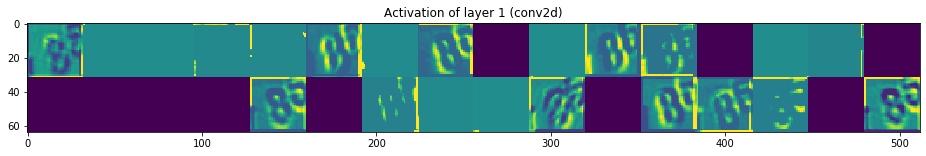

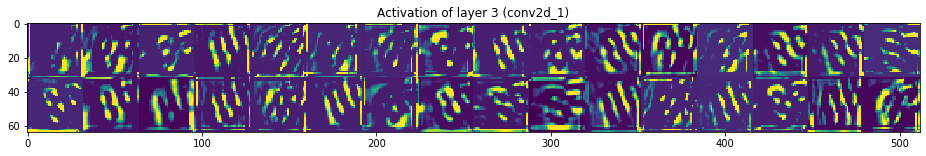

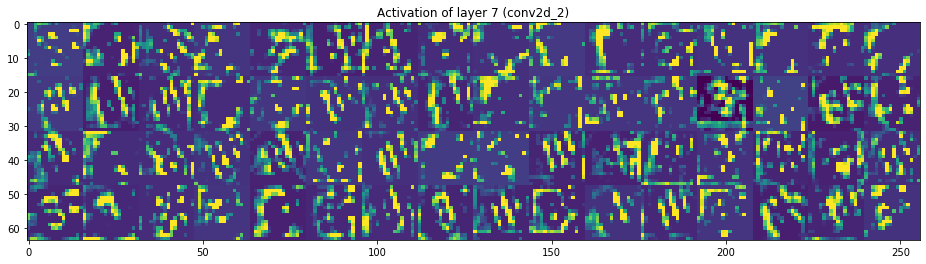

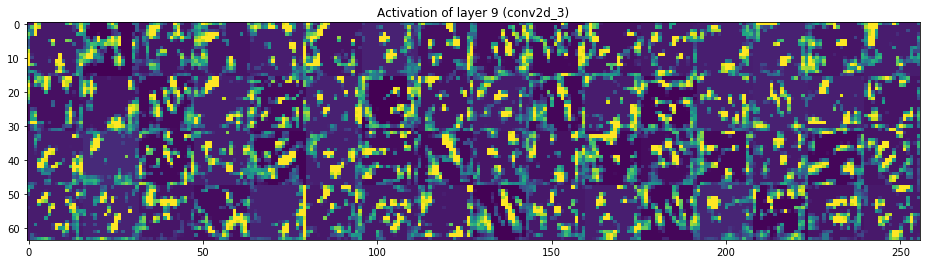

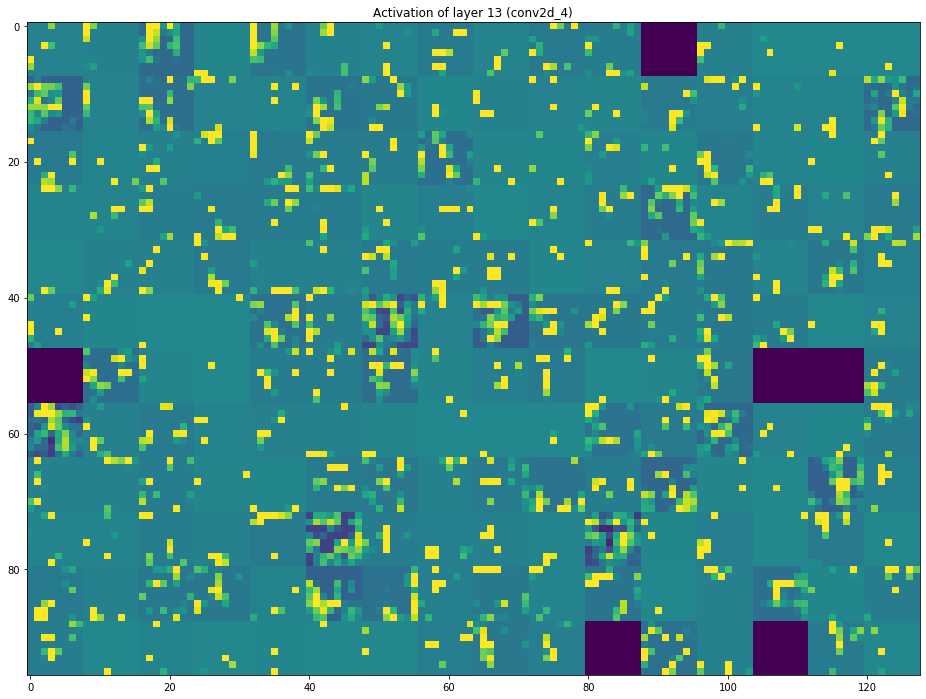

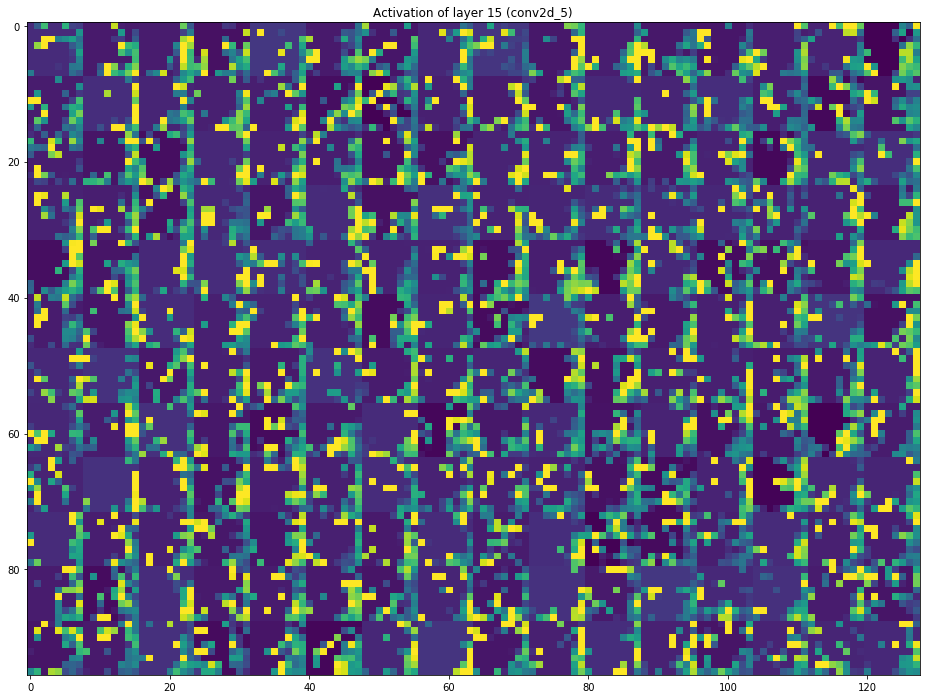

Answer is 487 characters long


In [19]:
def plot_activations():

    # Load model 2_2
    model = load_model_from_file(base_dir, "model_2_2", extension='.h5')

    # Get all layers outpouts
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    # Gray scale test images and pick first image to superimpose
    X_testGray = rgb2gray(X_test)
    img_tensor = X_testGray[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 

    activations = activation_model.predict(img_tensor)
    images_per_row = 16

    # Get all layer_names
    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name)  
    # 0 ,2, 6, 8 ,12, 14, the number which corresponds to the conv layer
    layersN = [0,2,6,8,12,14]
    # Display feature map with a for loop for each conv layer
    for i in layersN:
      layer_index=i
      start = layer_index
      end = layer_index+1
      for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
          # This is the number of features in the feature map
          n_features = layer_activation.shape[-1]

          # The feature map has shape (1, size, size, n_features)
          size = layer_activation.shape[1]

          # We will tile the activation channels in this matrix
          n_cols = n_features // images_per_row
          display_grid = np.zeros((size * n_cols, images_per_row * size))

          # We'll tile each filter into this big horizontal grid
          for col in range(n_cols):
              for row in range(images_per_row):
                  channel_image = layer_activation[0,
                                                  :, :,
                                                  col * images_per_row + row]
                  # Post-process the feature to make it visually palatable
                  channel_image -= channel_image.mean()
                  channel_image /= channel_image.std()
                  channel_image *= 64
                  channel_image += 128
                  channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                  display_grid[col * size : (col + 1) * size,
                              row * size : (row + 1) * size] = channel_image

          # Display the grid
          scale = 1. / size
          plt.figure(figsize=(scale * display_grid.shape[1],
                              scale * display_grid.shape[0]))
          plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
          plt.grid(False)
          plt.imshow(display_grid, aspect='auto', cmap='viridis')

      plt.show()

plot_activations();
answer_q_3_2 = """The 1st conv2d layer mainly focusses on the edges of the numbers,but also the outside edges of the image.
Some of the filters also don't respond in the 1st layer.
The 2nd,3rd and 4th layer conv layer focus more on on patterns(vertical/horizontal).
The 3rd conv layer seems to see clear holes of the 8
The last conv layers seems to learn more complex abstractions. It focusses more on the right edge of image.
The model is definitely learning and recognizing the edges and holes of the 8."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


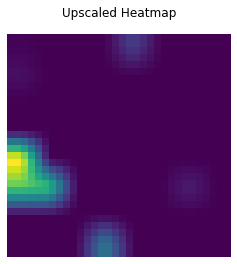

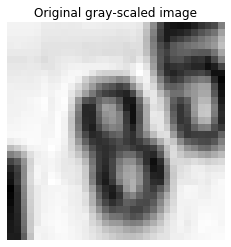

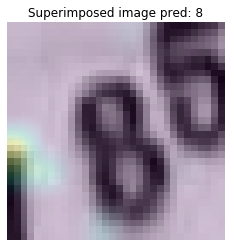

In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import cv2
from skimage.transform import resize

tensorflow.compat.v1.disable_eager_execution()

def plot_3_3():
  K.clear_session()

  # Load model 2_2
  model = load_model_from_file(base_dir, "model_2_2", extension='.h5')
  

  X_testGray = rgb2gray(X_test)
  
  # Do model prediction to get prediction of first image
  preds = model.predict(X_testGray)
  
  # Get predictions labels
  predictionsLabels = [(np.argmax(entry)+1)%10 for entry in preds]
  
  # Get gray-scaled image
  img_tensor = X_testGray[0]

  img_tensor = np.expand_dims(img_tensor, axis=0)

  # Get last conv layer conv2d_5
  last_conv_layer = model.get_layer('conv2d_5')

  first_output = model.output[:, 0]

  grads = K.gradients(first_output, last_conv_layer.output)[0]

  # Generate pooled grad values
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

  # for loop of 200, as this is the specified value for the last layer
  for i in range(200):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # Generate heatmap
  heatmap = np.mean(conv_layer_output_value, axis=-1)

  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # Resize the heatmap
  heatmap = cv2.resize(heatmap, (32, 32))

  # Show heatmap
  plt.matshow(heatmap)
  plt.title('Upscaled Heatmap')
  plt.axis('off')
  plt.show()

  dx, dy = 0.05, 0.05

  x = np.arange(0, 3.0, dx)
  y = np.arange(0, 3.0, dy)
  X, Y = np.meshgrid(x, y)

  # Show gray-scaled image
  fig = plt.figure(frameon=False)
  img_tensor = np.resize(img_tensor, (32,32))
  plt.imshow(img_tensor, cmap=plt.cm.gray)
  plt.title('Original gray-scaled image')
  plt.axis('off')
  plt.show()

  # Generate super imposed image
  im1 = plt.imshow(img_tensor, cmap=plt.cm.gray, interpolation='nearest')
  res = predictionsLabels[0].astype(str)
  im2 = plt.imshow(heatmap, cmap=plt.cm.viridis, alpha=.25, interpolation='bilinear')
  plt.title('Superimposed image pred: ' + res)
  plt.axis('off')
  plt.show()

plot_3_3()


## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D

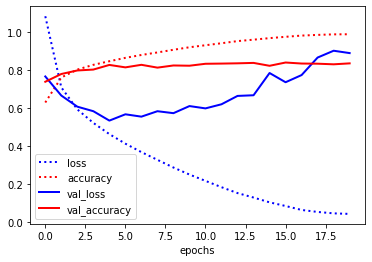

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
from tensorflow.keras.models import Model


def build_model_4_1():

  # Load in base model
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
  
  # Get output of the model
  x = base_model.output

  # Add a flattening layer to model output
  x = layers.Flatten()(x)
  # Add relu layer
  x = layers.Dense(256, activation='relu')(x)
  # Add a prediction layers
  predictions = layers.Dense(10, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  # Determine which layers to freeze
  for layer in model.layers:
      # Freeze all layers
      layer.trainable = False
      if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3' or layer.name == 'block5_pool' or ('dense' in layer.name) or ('flatten' in layer.name): 
          # Unfreeze a layer
          layer.trainable = True

  # Compile the model
  model.compile(optimizer=optimizers.Adagrad(lr=0.01),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
  # Return the model
  return model

# It was preproccessed_split changed to evaluation_split 
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=32)
answer_q_4_1 = """Freezing model gives an accuracy of 56%.
Unfreezing model, gives best val_accuracy,95.5%,but ofcourse longest training time as we lose all trained weights.
Unfreezing only last conv block,we still train half of the params,thus the model can use the last conv block to retrain some features.
Compared to previous models with no regularization, the accuracy is the same,it does overfit heavily from epoch 6 onwards,so regularization should be applied.
Unfreezing more layers results in better accuracy"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [83]:
import pickle
import gzip
import os.path
from sklearn import pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

# Store embeddings in files such that they can be loaded in later on
def store_embeddings():
  """ Stores all necessary embeddings to file
  """

  # Load model
  model = load_model_from_file(base_dir, "model_4_1", extension='.h5')
  
  # Get model output
  x = model.output

  # Define 'last' layer name and get that output of the model 4_1
  layer_name = 'block5_pool'
  intermediate_layer_model = tensorflow.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

  # Store embedding training
  embedding_train = intermediate_layer_model.predict(X_train)
  store_embedding(embedding_train, 'training')

  # Store embedding validation
  embedding_val = intermediate_layer_model.predict(X_val)
  store_embedding(embedding_val, 'validation')

  # Store embedding testing
  embedding_test = intermediate_layer_model.predict(X_test)
  store_embedding(embedding_test, 'testing')
  pass

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  return pipeline.Pipeline([("scaler", Normalizer()), ("svm", SVC(kernel='rbf'))])

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """

  # Check if testing_embedding is there, if so, other should also be there and thus don't start storing them first.
  # If embeddings are wrong, simply remove testing_embedding.
  check = os.path.isfile(base_dir + '/testing_embedding.p')
  if not check:
    store_embeddings()
  
  #Load embedding
  testing = load_embedding('testing')
  training = load_embedding('training')
  #validation = load_embedding('validation')

  testing = np.reshape(testing, (len(X_test), 512))
  training = np.reshape(training, (len(X_train), 512))
  #validation = np.reshape(validation, (len(X_test), 512))

  y_trainLabels = [(np.argmax(entry)+1)%10 for entry in y_train]
  y_testLabels = [(np.argmax(entry)+1)%10 for entry in y_test]
  #y_valLabels = [(np.argmax(entry)+1)%10 for entry in y_test]

  result = evaluate_pipeline(generate_pipeline(), training, y_trainLabels, testing, y_testLabels)
  return result

# Use this evaluation if one wants to test for validation data
#evaluation_4_2(X_train, y_train, X_val, y_val)

# Use this evaluation of one wants to test with testing data (final stage)
evaluation_4_2(X_train, y_train, X_test, y_test)

answer_q_4_2 = """We use the last layer to get the embedding of the images.
With the pipeline we evaluate the accuracy.
We test classifiers/scalers on val set and then 'confirm' on the test set.
Different scalers(MinMax,normalizer,Standard) have little effect on the result, same applies for different classifiers.
RBF gives best results(84,2), than logisticRegression(84,1), than RandomForrest(84%), than KNN (83,5%), which also takes longer to train.
Results are slightly better than model 4_4,but doesn't beat CNN."""

print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Accuracy: 0.8423305468828683
Pipeline: Pipeline(memory=None,
         steps=[('scaler', Normalizer(copy=True, norm='l2')),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 499 characters long
